<center><h1>Comparison between using trapezium rule and random sampling to approximate area under a curve</h1></center>
<center><h2>Hou Hin Ip (Izaac Ip)</h2></center>

<div align ='right'>Date: 11/12/2023</div>  
<div align ='right'>Name: Hou Hin Ip (Izaac Ip)</div>  

<h1><b>Table of Content</b></h1>

* 1. [Purpose](#Purpose)
* 2. [Main Code and Model Design](#Main_Code_and_Model_Design)  
    * 2.1. [Preparation](#Preparation)  
    * 2.2. [Trapezium Rule](#Trapezium_Rule)  
        * 2.2.1. [Motivation](#Trapezium_Rule_Motivation)
        * 2.2.2. [Main Code](#Trapezium_Rule_Main_Code)
    * 2.3. [Random Sampling](#Random_Sampling)  
        * 2.3.1. [Motivation](#Random_Sampling_Motivation)
        * 2.3.2. [Main Code](#Random_Sampling_Main_Code)
    * 2.4. [Error and Comparison](#Error_and_Comparison)
        * 2.4.1. [Graph Comparison](#Error_and_Comparison_Graph_Comparison)
        * 2.4.2. [Prepration for Error](#Error_and_Comparison_Prepration_for_Error)
        * 2.4.3. [Error of Trapezium Rule](#Error_and_Comparison_Error_of_Trapezium_Rule)
        * 2.4.4. [Error of Random Sampling](#Error_and_Comparison_Error_of_Random_Sampling)
        * 2.4.5. [Comparison for error of two methods](#Error_and_Comparison_Comparison_for_error_of_two_methods)
* 3. [Conclusion](#Conclusion)

<a id='Purpose'>
<h1>1. Purpose</h1>
</a>

The aim of this project is to approxiamte the area under a curve (which is  $y = 10 + x ^ 2 - 0.1 * x ^ 3$) for $x\in[-10,10]$ by two methods:
1. Using Trapezium Rule  
2. Using Random Sampling  

After that, compare the two methods to find out which method have better performance.


<a id='Main_Code_and_Model_Design'>
<h1>2. Main Code and Model Design</h1>
</a>

<a id='Preparation'>
<h2>2.1. Preparation</h2>
</a>

First import the package numpy and matplotlib.

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

Create function for the curve $y = 10 + x ^ 2 - 0.1 * x ^ 3$.

In [2]:
# Input : x: Real number, which is between -10 to 10
# Output : y: Real number, which y = 10 + x ^ 2 - 0.1 * x ^ 3
def return_y_value(x):
    return 10 + x ** 2 - 0.1 * x ** 3

Create function for building numpy array in the interval $[-10,10]$.

In [3]:
# Input : gap: Real number, which is the space of adjacent elements for the x array
# Output : Numpy array in range[-10,10], with spacing = gap
def create_np_array_for_x(gap):
    return np.arange(-10.0, 10.0 + gap, gap)

Prepare format for plotting graph.

In [4]:
# Input : graph: Graph which is used to be plotted
#         title: Title for the graph
#         description: Description for the graph
#         description_pos: array with length 2, the position of description written in the format (x,y)
# Output : the graph will be plotted with format
def plot_graph_formatting(graph, title, description, description_pos):
    graph.legend(loc="upper right", fontsize=8)

    # Check if graph is a subplot or the whole plot
    if graph != plt:
        # Set title, label and axes for subplot graph
        graph.set_title(title)
        graph.set(xlabel="x - label", ylabel='y - label')

        plt.xlim((-10, 10))
        plt.yticks(np.arange(0, 225, 25))

        fig.tight_layout(pad=1)
    else:
        # Set title, label and axes for the whole plot
        plt.title(title)
        plt.xlabel("x - label")
        plt.ylabel("y - label")

        plt.xlim((-10, 10))
        plt.yticks(np.arange(0, 225, 25))

    if description != None:
        # Print description in a orange box if there is a descripition input
        props = dict(boxstyle='round', facecolor='orange', alpha=0.5)
        graph.text(description_pos[0], description_pos[1], description, fontsize=10,
                   verticalalignment='top', bbox=props)


Build numpy array for plotting curve $y = 10 + x ^ 2 - 0.1 * x ^ 3$.

In [5]:
# Define the gap between each x for function
# Increasing the gap value will get less precise curve, decreasing will get the opposite result
gap_between_each_x_function = 0.1

# Create list of points for function, which x is in the range  [-10, 10], y = 10 + x ^ 2 - 0.1 * x ^ 3
x_list_function = create_np_array_for_x(gap_between_each_x_function)
y_list_function = return_y_value(x_list_function)

Plot out the curve function.

In [6]:
def plot_curve(curve_graph):
    curve_graph.plot(x_list_function, y_list_function, label=r'$ y = 10 + x^2 - 0.1 x^3 $', color='black')

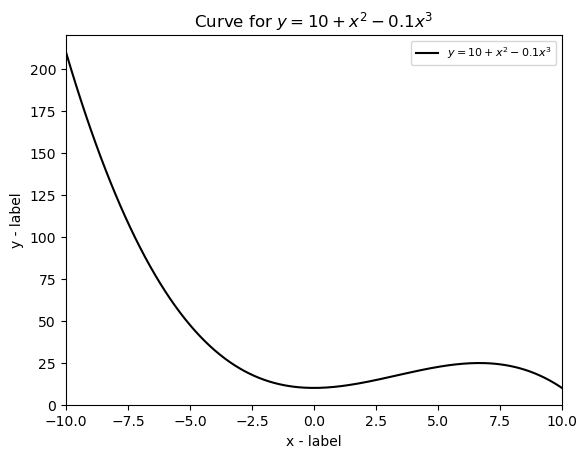

In [7]:
plot_curve(plt)

# Plot graph
plot_graph_formatting(plt, "Curve for $ y = 10 + x^2 - 0.1 x^3 $", None, None)
plt.show()

As seen in the graph, we can find out that the curve $ y = 10 + x^2 - 0.1 x^3 $ is positive when $x\in[-10,10]$.  
It is clear that there is a maximum point when $x=-10$, in which $y = 10 + (-10)^2 - 0.1 \times (-10)^3 = 210$.  
Although it is not clear enough, but we can find the minimum points in the graph are at $x = 0.0$ or $x = 10.0$, in which both $y = 10$ (The result is get by calculating $f'(x) = 0$ and local minimum definition).

<a id='Trapezium_Rule'>
<h2>2.2. Trapezium Rule</h2>
</a>

<a id='Trapezium_Rule_Motivation'>
<h3>2.2.1. Motivation</h3>
</a>

Trapezium Rule is based on approximating $f(x)$ by the stright line joining $(a,f(a))$ and $(b,(f(b))$. Here we assume $a<b$, $[a,b]$ is finite and $b-a$ is sufficiently small. To integrate the formula of this stright line, we have the approximation:

$$
I_1(f) = (\frac{b-a}{2})[f(a)+f(b)]
$$

which is basically a formula of trapezium area.

For $b-a$ is not sufficiently small, we seperate the integral into a sum of intergrals over small subintervals.  
Let $ n \leq 1, h = \frac{b-a}{n}, x_j = a +jh  $ for  $j=0,1,2,...,n$  :

$$
\begin{eqnarray}    \label{eq}
I(f) = \int^b_a f(x)dx &=& \sum^n_{j=1}\int^{x_j}_{x_{j-1}f(x)dx}\\
&=& \sum^n_{j=1}{\frac{h}{2}[f(x_{j-1})+f(x_j)]}
\end{eqnarray}
$$

which is the sum of the area of trapeziums in the interval.

<a id='Trapezium_Rule_Motivation'>
<h3>2.2.2. Main Code</h3>
</a>

Prepare function for calculating trapezium area, the following equation determines the area of a trapezium:  

$$A_{trapezium}=\frac{a+b}{2}h=\frac{y_0+y_1}{2}(x_1-x_0) $$
$a$, $b$ : Bases of the trapezium  
$x_0$, $y_0$, $x_1$, $y_1$ : Cooridnate of the two points

In [8]:
# Input : x0, x1: Real numbers, which are between -10 to 10
# Output : The area of trapezium between x0 and x1, which is equal to (y0 + y1) * (x1 - x0) / 2,
#          y0 and y1 is the value of f(x0) and f(x1) respectively
def trapezium_area(x0, x1):
    return (return_y_value(x0) + return_y_value(x1)) * (x1 - x0) / 2

Build numpy array for plotting trapezium Rule.

In [9]:
gap_between_each_x_trapezium = 3

# Create list of points for trapezium rule, which X is in the range  [-10, 10], y = 10 + x ^ 2 - 0.1 * x ^ 3
x_list_trapezium = create_np_array_for_x(gap_between_each_x_trapezium)
y_list_trapezium = return_y_value(x_list_trapezium)

Plot the upper lines of the trapeziums and the curve of the function to make a comparsion.

In [10]:
def plot_trapezium_upper_line(trapezium_graph):
    trapezium_graph.plot(x_list_trapezium, y_list_trapezium, label="Trapezium approximation", color='orange')

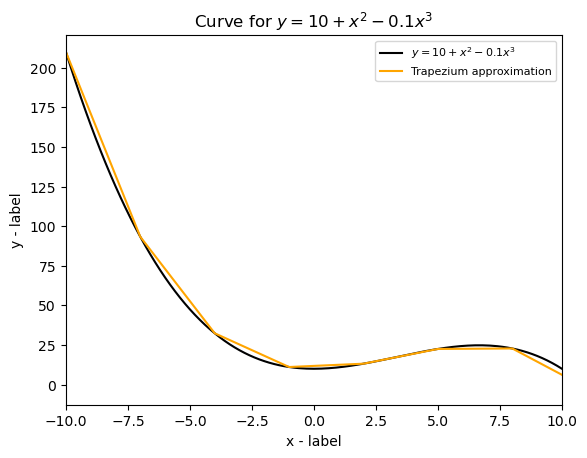

In [11]:
plot_curve(plt)
plot_trapezium_upper_line(plt)

# Plot graph
plot_graph_formatting(plt, "Curve for $ y = 10 + x^2 - 0.1 x^3 $", None, None)
plt.show()

Create array for saving the value of area of each trapezium.

In [12]:
area_each_trapeziums = []

Plot Trapezium with filling area, in the mean time calculate the area of each trapezium.

In [13]:
# Plot Trapezium rule with filling area
def plot_trapezium_filling_area(trapezium_filling_graph):
    area_each_trapeziums = []
    for i in range(len(x_list_trapezium) - 1):
        # Prepare 4 points for the vertices of trapezium
        xs = [x_list_trapezium[i], x_list_trapezium[i], x_list_trapezium[i + 1], x_list_trapezium[i + 1]]
        ys = [0, return_y_value(x_list_trapezium[i]), return_y_value(x_list_trapezium[i + 1]), 0]
        # Fill the area rounded by the points
        trapezium_filling_graph.fill(xs, ys, 'tab:purple', alpha=0.2, edgecolor='grey', linewidth=1)
        # Calculate the area and append it into the list
        area_each_trapeziums.append(trapezium_area(x_list_trapezium[i], x_list_trapezium[i + 1]))
    total_area_by_trapezium = sum(area_each_trapeziums)
    description_for_trapezium = f"Approximation area: {total_area_by_trapezium.__round__(2)}\n" \
                                f"Used trapezium: {len(x_list_trapezium)-1}"
    return description_for_trapezium
        

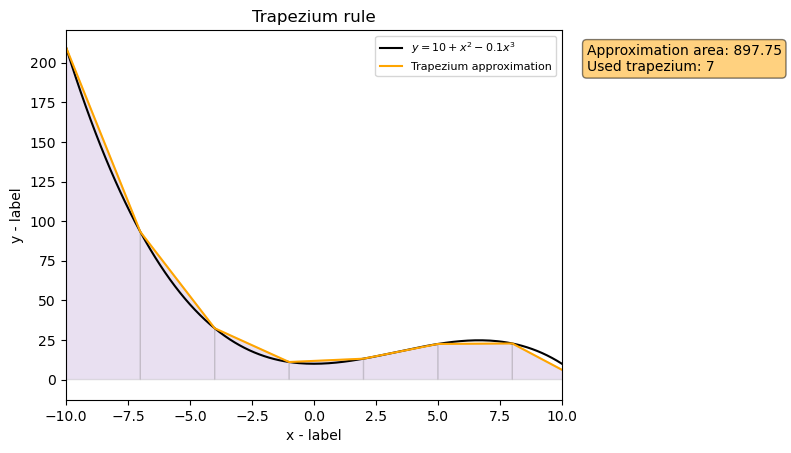

The area of the 1th trapezium is 454.95
The area of the 2th trapezium is 188.55
The area of the 3th trapezium is 65.25
The area of the 4th trapezium is 36.45
The area of the 5th trapezium is 53.55
The area of the 6th trapezium is 67.95
The area of the 7th trapezium is 31.05


In [38]:
plot_curve(plt)
plot_trapezium_upper_line(plt)
description_for_trapezium = plot_trapezium_filling_area(plt)

plot_graph_formatting(plt, title="Trapezium rule", description=description_for_trapezium, description_pos = [11, 212])
plt.show()

for index in range(len(area_each_trapeziums)):
    print(f"The area of the {index+1}th trapezium is {area_each_trapeziums[index].round(2)}")

<a id='Random_Sampling'>
<h2>2.3. Random Sampling</h2>
</a>

<a id='Random_Sampling_Motivation'>
<h3>2.3.1. Motivation</h3>
</a>

In the random sampling section, we are drawing random points in a fix area, which means fix interval for both $x$ and $y$. We can find out the probability that a random point is drawn under the curve function $f(x)$ is:  
$$p=\frac{A_{curve}}{A_{fix}}$$  

$p$ : probability that a random point is drawn under the curve $f(x)$  
$A_{fix}$ :  area of the fix area  
$A_{curve}$ :  area of the curve in the fix interval

Therefore we can easily find that:  
$$A_{curve}=p \times A_{fix}$$

For random sampling, if we find a large number of samples (in here it means random points) that is close to infinite, the proportion of samples that satisfy the condition and the total number of samples will approach to the true probability of the condition. We defined the total number of sample as $n$, therefore we have:  

$$\lim_{n \rightarrow \infty}\frac{n_{curve}}{n} = p$$

$n_{curve}$ : number of samples that satisfy the condition, in here is the number of points drawn under the curve $f(x)$  
$n$ : total number of samples  
$p$ : probability that a random point is drawn under the curve $f(x)$

Therefore we have:  
$$A_{curve} = \lim_{n \rightarrow \infty} \frac{n_{curve}}{n} \times A_{fix}$$

Although we will never perform $\infty$ in real life situitation, We can make approximation by making $n$ big enough:    

$$ \frac{n_{curve}}{n} \times A_{fix} = A_{approixmation} \approx A_{curve} $$  

$n_{curve}$ : number of points drawn under the curve $f(x)$  
$n$ : total number of samples  
$p$ : probability that a random point is drawn under the curve $f(x)$  
$A_{fix}$ :  area of the fix area  
$A_{approximation}$ : area approximated by our method  
$A_{curve}$ :  area of the curve in the fix interval  


<a id='Random_Sampling_Main_Code'>
<h3>2.3.2. Main Code</h3>
</a>

Prepare function for calculating the area of rectangle, the equation below determines the area of a rectangle:  

$$A_{rectangle} = h \times w = (y_0+y_1) \times (x_1-x_0)$$
$h$ : Height of the rectangle  
$w$ : Width of the rectangle

In [15]:
# Input : x0, x1: Real numbers, which are between -10 to 10
# Output : The area of rectangle between x0 and x1
#          which is equal to (y0 + y1) * (x1 - x0)
def rectangle_area(x0, y0, x1, y1):
    return abs(x1 - x0) * abs(y1 - y0)

Prepare for random function, number of random points and the range where random points are generated at.

In [16]:
# Prepare random function and variable for random point range, also range for random points to be generated
rng = random.default_rng(1000)
num_of_random_points = 1000
x_low, x_high, y_low, y_high = -10, 10, 0, 220

Create numpy array for random points.

In [17]:
# Create numpy array for random points
x_random = np.array(rng.uniform(low=x_low, high=x_high, size=num_of_random_points))
y_random = np.array(rng.uniform(low=y_low, high=y_high, size=num_of_random_points))

Find out the random points under the curve, save them into another numpy array and count the number of them.

In [18]:
# Create numpy array for random points under the curve
points_under_curve_x = x_random[y_random < return_y_value(x_random)]
points_under_curve_y = y_random[y_random < return_y_value(x_random)]

# Count the number of point under the curve
num_of_points_under_function = len(points_under_curve_x)

Approximate the area by using the formula: $$A_{random} =\frac{n_{curve}}{n} \times A_{fix} $$  
$A_{random}$: Area calculated by random sampling approximation  
$n_{curve}$: Number of random points under the curve   
$n$: Number of total random points   
$A_{fix}$: Area of the rectangle where random points are spawned

In [19]:
# Approximate the area by random number,
# which is equal to number of points under curve / number of all random points * total area of random number
approximation_area_random_point = num_of_points_under_function / num_of_random_points * rectangle_area(x_low, y_low,
                                                                                                       x_high,
                                                                                                       y_high)

Plot the random points in scatter point forms.

In [20]:
# Input : point_size: Size of each point shown in the graph
#         random_graph : Graph to be plotted on
# Output : Random_graph is plotted with scatter points
#          description_for_random: the description which is used for formatting,
#                                  the text talks about the approximation area and used ranodom number
def plot_random_points(point_size, random_graph):
    random_graph.scatter(x_random, y_random, alpha=0.5, s=point_size, label='All randomly chosen points')
    random_graph.scatter(points_under_curve_x, points_under_curve_y,
                         marker='x', alpha=0.5, color='red', s=point_size, label='Points under curve')
    description_for_random = f"Approximation area: {approximation_area_random_point.__round__(2)}\n" \
                             f"Used random number: {num_of_random_points}"
    return description_for_random

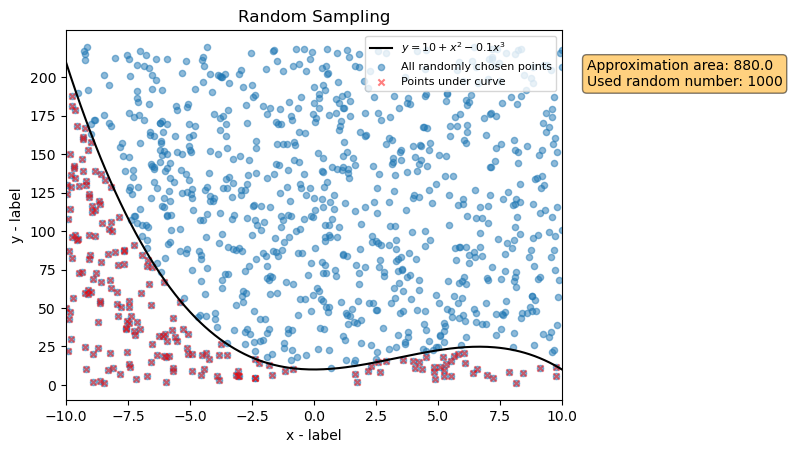

In [21]:
plot_curve(plt) # plot curve
description_for_random = plot_random_points(20, plt) # plot the random points

# Format the graph
plot_graph_formatting(plt, title="Random Sampling", description=description_for_random, description_pos = [11,212])
plt.show()

<a id='Error_and_Comparison'>
<h2>2.4. Error and Comparison</h2>
</a>

<a id='Error_and_Comparison_Graph_Comparison'>
<h3>2.4.1. Graph Comparison</h3>
</a>

We can put the two graph into the one plot to see have a better view.

/tmp/ipykernel_158/1793246319.py:16: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=1)


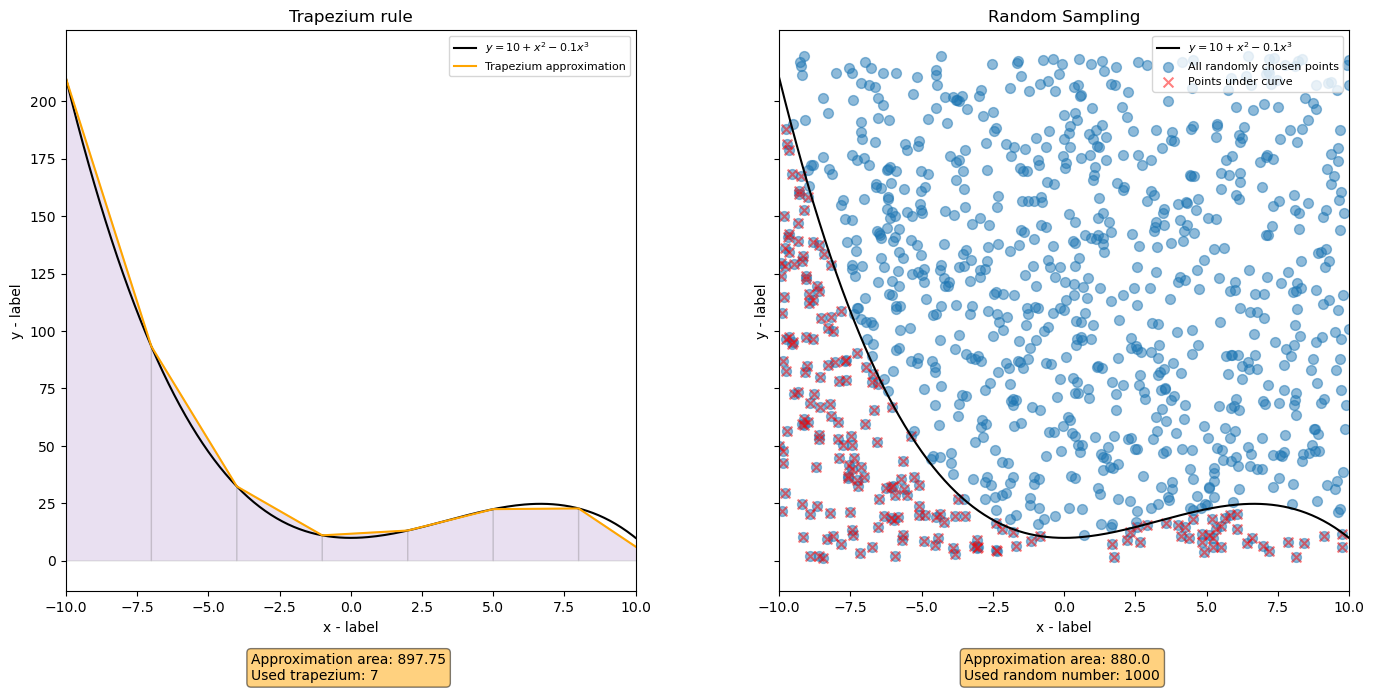

In [22]:
# Make the plot into subplots
fig, (trapezium_graph, random_graph) = plt.subplots(1, 2, sharex=True, sharey=True)

# Plot for trapezium graph
plot_curve(trapezium_graph)
plot_trapezium_upper_line(trapezium_graph)
description_for_trapezium = plot_trapezium_filling_area(trapezium_graph)

# Plot for random graph
plot_curve(random_graph)
description_for_random = plot_random_points(50, random_graph)

# Format the plotting
plot_graph_formatting(trapezium_graph, title="Trapezium rule", description=description_for_trapezium, description_pos = [-3.5,-40])
plot_graph_formatting(random_graph, title="Random Sampling", description=description_for_random, description_pos = [-3.5,-40])
fig.set_figwidth(15)
fig.set_figheight(7.5)

plt.show()

<a id='Error_and_Comparison_Prepration_for_Error'>
<h3>2.4.2. Prepration for Error</h3>
</a>

It can be easily calculated by intergration that the true area under the curve $ y = 10 + x^2 - 0.1 x^3 $ is $ 866.\dot{6}$ (It is also told in the project requirement).

$$
\begin{eqnarray}
A_{curve} &=& \int^{10}_{-10}10 + x^2 - 0.1x^3 = 10x + \frac{1}{3}x^3 - \frac{1}{40}x^4 \bigg|^{10}_{-10}\\
&=&(10 \times 10 + \frac{1}{3} \times 10^3 - \frac{1}{40} \times 10^4) - [ 10 \times (-10) + \frac{1}{3} \times (-10)^3 - \frac{1}{40} \times (-10)^4]\\
&=& \frac{550}{3} + \frac{2050}{3}\\
&=& \frac{2600}{3}\\
&=& 866.\dot{6}
\end{eqnarray}
$$

In order to calculate errors and make comparison, we will make new functions for both two methods, which are used to calculate the approximation but not plotting the graph.  
Codes in both function are copied from [2.2. Trapezium Rule](#Trapezium_Rule) and [2.3. Random Sampling](#Random_Sampling).

In [23]:
# Calculate trapezium rule approximation
# Input : numbers_of_trapezium: A array containing different numbers of trapeziums
# Output : areas_by_trapezium: A array, Area approximated by trapezium rule by different numbers of trapeziums
def cal_trapezium_area(numbers_of_trapezium):
    areas_by_trapezium = []
    for number in numbers_of_trapezium:
        x_list_trapezium = np.linspace(-10, 10, number) # Create array for x points
        area_each_trapeziums = []
        
        for i in range(len(x_list_trapezium) - 1):
            # Calculate the area of each trapezium and append it into the list
            area_each_trapeziums.append(trapezium_area(x_list_trapezium[i], x_list_trapezium[i + 1]))
            
        total_area_by_trapezium = sum(area_each_trapeziums)
        areas_by_trapezium.append(total_area_by_trapezium)
    return areas_by_trapezium

In [24]:
# Calculate randomm sampling approximation
# Input : numbers_of_random_points: A array containing different numbers of random points
# Output : areas_by_random: A array, Area approximated by random sampling by different numbers of random points
def cal_random_sampling(numbers_of_random_points):
    areas_by_random = []
    for number in numbers_of_random_points:   
        # Prepare range for random points to be generated
        x_low, x_high, y_low, y_high = -10, 10, 0, 220
        
        # Create numpy array for random points
        x_random = np.array(rng.uniform(low=x_low, high=x_high, size=number))
        y_random = np.array(rng.uniform(low=y_low, high=y_high, size=number))
        
        # Create numpy array for random points under the curve
        points_under_curve_x = x_random[y_random < return_y_value(x_random)]
        points_under_curve_y = y_random[y_random < return_y_value(x_random)]
    
        # Count the number of point under the curve
        num_of_points_under_function = len(points_under_curve_x)
        
        # Approximate the area by random number,
        # which is equal to number of points under curve / number of all random points * total area of random number
        approximation_area_random_point = num_of_points_under_function / number * rectangle_area(x_low, y_low,
                                                                                                               x_high,
                                                                                                               y_high)
        # Append the approximation into the array
        areas_by_random.append(approximation_area_random_point)
    return areas_by_random

We can calculate percentage error by the formula:  

$$
{\%\space error} = \frac{v_a - v_e}{v_e} \times 100\%
$$
$v_a$ : approximate value  
$v_e$ : exact value

Therefore we can make a function to perform percentage error function.

In [25]:
# Calculate percentage error
# Input : v_a: Approximate value, in here it is a array
#         v_e: Exact Value
# Output : the array containing different percentage error by different approximate value
def percentage_error(v_a, v_e):
    # Assign percentage error list
    error_list = []
    
    # Calculate percentage error for each value
    for v in v_a:
        error_list.append(abs((v - v_e)/v_e * 100))
        
    return error_list

<a id='Error_and_Comparison_Error_of_Trapezium_Rule'>
<h3>2.4.3. Error of Trapezium Rule</h3>
</a>

Now we can plot the relationship between the number of trapezium and percentage error.

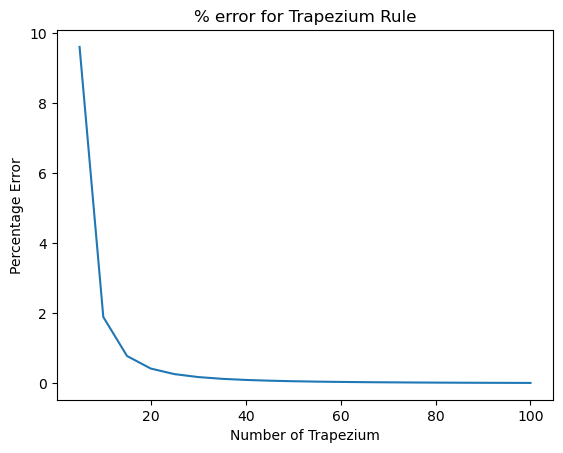

In [26]:
# Prepare numpy array for number of trpaezium
numbers_of_trapezium = np.arange(5,105,5)

# Generate percentage error array based on the number of trapezium
percentage_error_trapezium = percentage_error(cal_trapezium_area(numbers_of_trapezium), 866.666666666)

# Plot for trapezium graph
plt.plot(numbers_of_trapezium, percentage_error_trapezium)

# Set title and label
plt.title("% error for Trapezium Rule")
plt.xlabel("Number of Trapezium")
plt.ylabel("Percentage Error")

plt.show()

The graph perform similar to a exponential distribution, we can find a stright line if we perform log in both x-axis and y-axis.

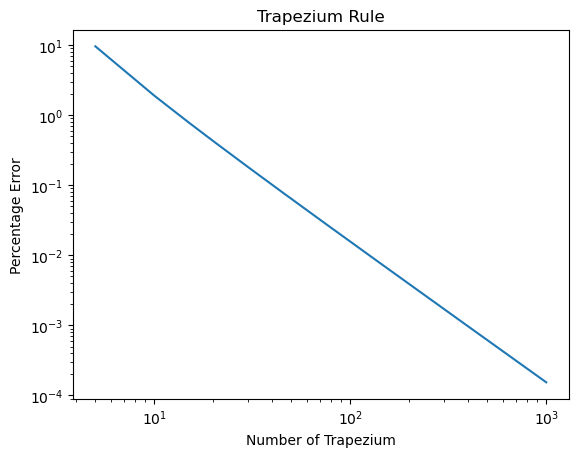

In [27]:
# Prepare numpy array for number of trpaezium
numbers_of_trapezium = np.arange(5,1005,5)

# Generate percentage error array based on the number of trapezium
percentage_error_trapezium = percentage_error(cal_trapezium_area(numbers_of_trapezium), 866.666666666)

# Plot for trapezium graph
plt.plot(numbers_of_trapezium, percentage_error_trapezium)

# Set title and label
plt.title("Trapezium Rule")
plt.xlabel("Number of Trapezium")
plt.ylabel("Percentage Error")

# Scale it in log scale
plt.xscale("log")
plt.yscale("log")

plt.show()

As seen in the graph, we can find out that the number of trapezium and percentage error has a direct proportion relationship.  
Which means that when we have $Y=\log_{10}(y)$ and $X=\log_{10}(x)$, we have $Y = kX$.  
We can get the stright line by getting the two points in the graph.

In [28]:
print(f"The first point is (x_1, y_1) = ({numbers_of_trapezium[0]},{percentage_error_trapezium[0]})")
print(f"The first point in logarithm is (log(x_1), log(y_1) = ({np.log10(numbers_of_trapezium[0])},{np.log10(percentage_error_trapezium[0])})")

print(f"The last point is (x_2, y_2) = ({numbers_of_trapezium[-1]},{percentage_error_trapezium[-1]})")
print(f"The last point in logarithm is (log(x_2), log(y_2) = ({np.log10(numbers_of_trapezium[-1])},{np.log10(percentage_error_trapezium[-1])})")

The first point is (x_1, y_1) = (5,9.615384615468939)
The first point is (log(x_1), log(y_1) = (0.6989700043360189,0.9829666607050283)
The last point is (x_2, y_2) = (1000,0.00015415438521755383)
The last point is (log(x_2), log(y_2) = (3.0,-3.8120441164211116)


We can use the stright line formula.  
$$
\begin{eqnarray}    \label{eq}
Y - y_1 &=& \frac{y_2 - y_1}{x_2 - x_1}(X - x_1)\\ 
Y - 0.9829666607050283 &=& \frac{-3.8120441164211116 - 0.9829666607050283}{3.0-0.6989700043360189}(X-0.6989700043360189)\\
Y - 0.9829666607050283 &=& -2.08385409(X-0.6989700043360189)\\
Y &=& -2.08385409X + 2.439518163\\
\log_{10}y &=& -2.08385409\log_{10}x + 2.439518163\\
y &=& 10^{-2.08385409\times\log_{10}x + 2.439518163}\\
y &=& 10^{2.439518163} \times x^{-2.08385409}
\end{eqnarray}
$$  

We can get the approximated (3 decimal place) line as,
$$y = x^{-2.084} \times 10^{2.440}$$


Plot out the line and compare it to the original graph.

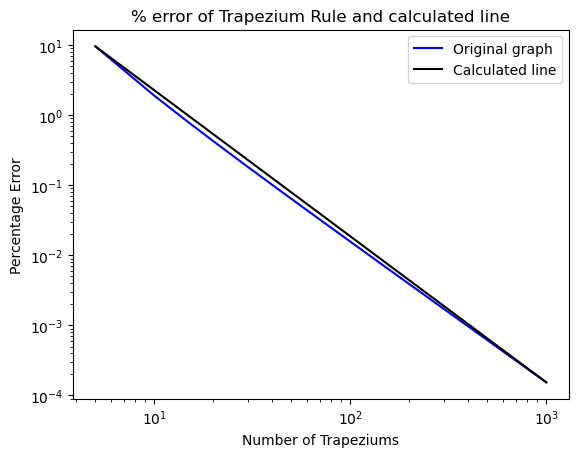

In [29]:
def g(x):
    return (10 ** 2.439518163) * (x ** -2.08385409)

# Plot for trapezium graph
plt.plot(numbers_of_trapezium, percentage_error_trapezium, color = "blue", label = "Original graph")
plt.plot(numbers_of_trapezium, g(numbers_of_trapezium), color = "black", label = "Calculated line")

# Set title, label and legend
plt.title("% error of Trapezium Rule and calculated line")
plt.xlabel("Number of Trapeziums")
plt.ylabel("Percentage Error")
plt.legend(loc ="upper right")

# Scale it in log scale
plt.xscale("log")
plt.yscale("log")

plt.show()

Although the original graph is not the same as out calculated line, but we can still use the formula to approximate the error of trapezium rule as the difference is sufficiently small

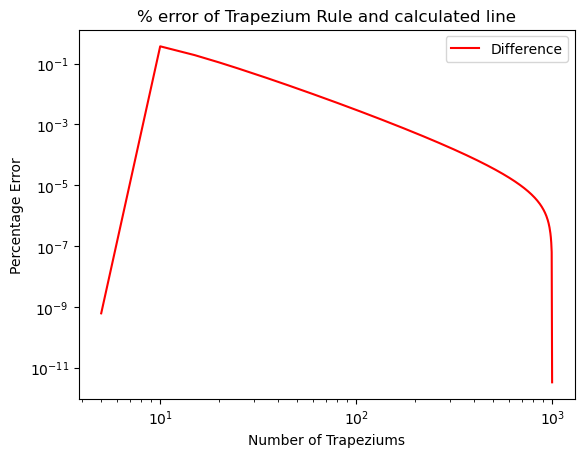

In [30]:
plt.plot(numbers_of_trapezium, abs(g(numbers_of_trapezium) - percentage_error_trapezium), color = "red", label = "Difference")

# Set title, label and legend
plt.title("% error of Trapezium Rule and calculated line")
plt.xlabel("Number of Trapeziums")
plt.ylabel("Percentage Error")
plt.legend(loc ="upper right")

# Scale it in log scale
plt.xscale("log")
plt.yscale("log")

plt.show()

We can see that the difference between the original graph and our calculation is mostly smaller than $10^{-1}$ and positive. Therefore the difference is sufficiently small.

<a id='Error_and_Comparison_Error_of_Random_Sampling'>
<h3>2.4.4. Error of Random Sampling</h3>
</a>

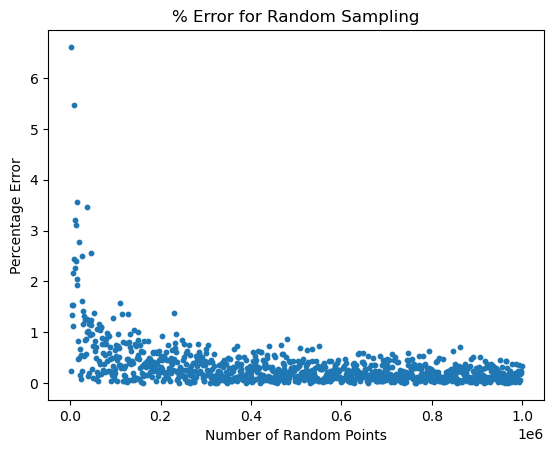

In [31]:
# Prepare list for number of random points
numbers_of_random_points = np.arange(1000,1000000,1000)

# Generate percentage error list based on the number of random points
percentage_error_random = percentage_error(cal_random_sampling(numbers_of_random_points), 866.666666666)

# Plot for random graph
plt.scatter(numbers_of_random_points, percentage_error_random, s=10)

# Set title and label
plt.title("% Error for Random Sampling")
plt.xlabel("Number of Random Points")
plt.ylabel("Percentage Error")

plt.show()

We can try to plot it in log scales.

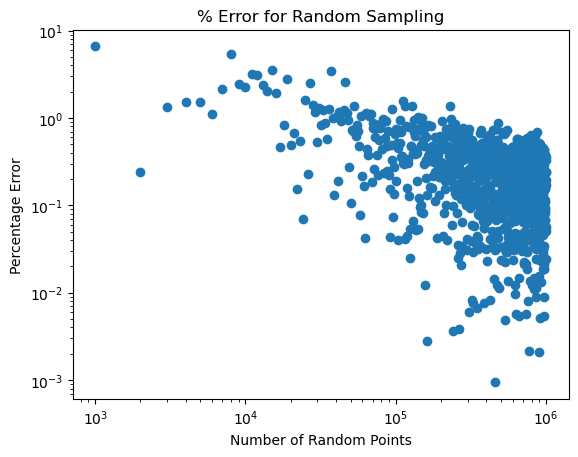

In [32]:
# Plot for random graph
plt.scatter(numbers_of_random_points,percentage_error_random)

# Set title and label
plt.title("% Error for Random Sampling")
plt.xlabel("Number of Random Points")
plt.ylabel("Percentage Error")

# Set scale as log
plt.xscale("log")
plt.yscale("log")

plt.show()

From the graph, we can find out that when number of random number is incraseing, percentage error is decrasing and  approaching $0$ from above. The outliners have the best performance among all.  
  
The outliners in different interval perform different interval of percentage error:  
Outliners in $[10^3, 10^4]$ have percentage error in $[10^{1},10^{-1}]$  
Outliners in $[10^4, 10^5]$ have percentage error in $[10^{-1},10^{-3}]$  
Outliners in $[10^5, 10^6]$ have percentage error in $[10^{-3},10^{-4}]$ 
  
However, the number of outliners is relativly small compared to the total number, where majority have percentage error in the interval $[10^{0},10^{-2}]$ when the number point is in $[10^{3},10^{6}]$.

In [33]:
# Print out the mean of percentage error
print(f"The mean of percentage error is {np.mean(percentage_error_random)}")

0.3254457322925766


The mean of percentage error is in the interval $[10^0, 10^{-2}]$, this proves the our statement above.

<a id='Error_and_Comparison_Comparison_for_error_of_two_methods'>
<h3>2.4.5. Comparison for error of two methods</h3>
</a>

We can plot a graph to comapre the error of two methods.

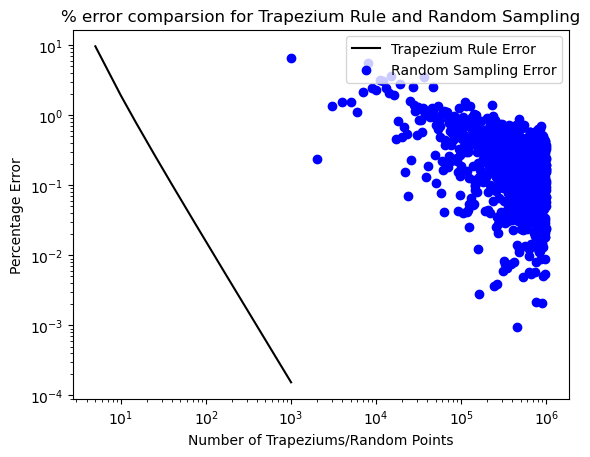

In [34]:
# Plot error for trapezium rule
plt.plot(numbers_of_trapezium, percentage_error_trapezium, color = "black", label = "Trapezium Rule Error")
# Plot error for random sampling
plt.scatter(numbers_of_random_points,percentage_error_random, color = "blue", label = "Random Sampling Error")

# Set title,label and legend
plt.title("% error comparsion for Trapezium Rule and Random Sampling")
plt.xlabel("Number of Trapeziums/Random Points")
plt.ylabel("Percentage Error")
plt.legend(loc ="upper right")

# Set scale as log
plt.xscale("log")
plt.yscale("log")

plt.show()

We can see that for achieving percentage error lower than $10^{-3}$, we need more than $433$ trapeziums or $10^6$ random points, which means that using trapezium rule have a much better performance that using random sampling in this project.  
  
Remakr: The approximation of number of trapeziums for achieving percentager error lower than $10^{-3}$ is calculated from the forumla:  

$$y = 10^{2.439518163} \times x^{-2.08385409}$$  
  
where $y = 10^{-3}$

<a id='Conclusion'>
<h1>3. Conclusion</h1>
</a>

From the comparison in [2.4.5. Comparison for error of two methods](#Error_and_Comparison_Error_of_Random_Sampling), we can see that for approximate the area of the curve $y = 10 + x ^ 2 - 0.1 * x ^ 3$. Although both trapezium rule and random sampling method can lower the percentage error by increasing the number of trapeziums or random points, the number of needed trapeziums is much smaller than the number of needed random points provided the same percentage error. For example, for achieving percentage error lower than $10^{-3}$ , we need more than $433$ trapeziums or $10^6$ random points (The result is shown in [2.4.5. Comparison for error of two methods](#Error_and_Comparison_Error_of_Random_Sampling)). That means more memory and time is needed for random sampling method than trapezium rule in order to achieving the same percentage error. To conclude, trapezium rule is a better method than random sampling in approximating the area of the curve y = 10 + x ^ 2 - 0.1 * x ^ 3$.

However, as we are just using the method to approximate the area of a positive function in a certain interval, it does not mean that trapezium rule will always better than random sampling. The performance of the trapezium rule and random sampling may vary when the function or the curve has different properties, for example, negative function, function having unlimited interval or function having more than 2 dimensions.